In [ ]:
# important libraries(modules)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading dataset
df = pd.read_csv('train.csv')

In [ ]:
# test dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Age

**conclusions**

- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

In [ ]:
# statistics test
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

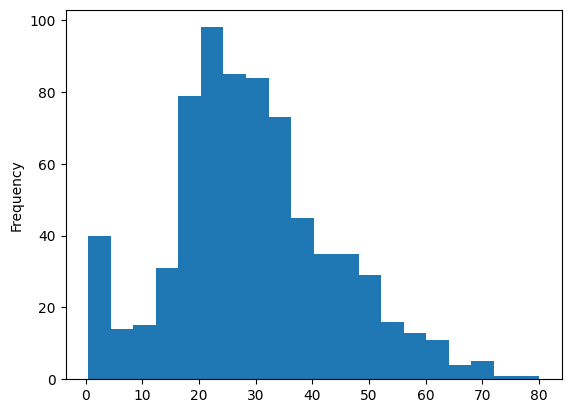

In [ ]:
# finding average age using hist plot
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

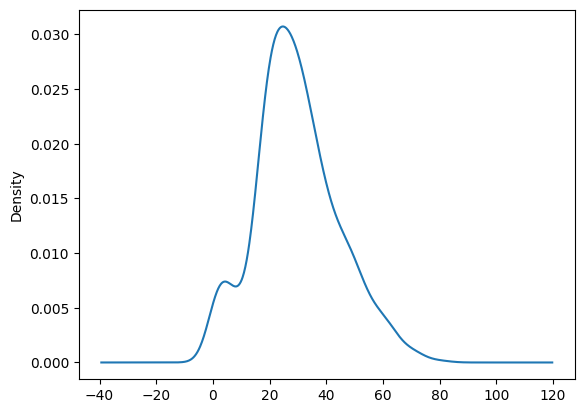

In [ ]:
# finding average age using kde plot
df['Age'].plot(kind='kde')

In [ ]:
# finding skewness of the age column
df['Age'].skew()

0.38910778230082704

<Axes: >

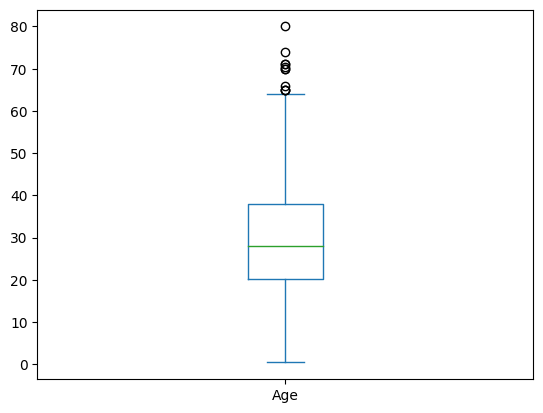

In [ ]:
# finding outliers using box plot
df['Age'].plot(kind='box')

In [ ]:
# having greater than 65 age in age column
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
# missing values in the age column
df['Age'].isnull().sum()/len(df['Age'])

0.19865319865319866

### Fare

**conclusions**

- The data is highly(positively) skewed
- Fare col actually contains the group fare and not the individual fare(This migth be and issue)
- We need to create a new col called individual fare

In [ ]:
# statistical test
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

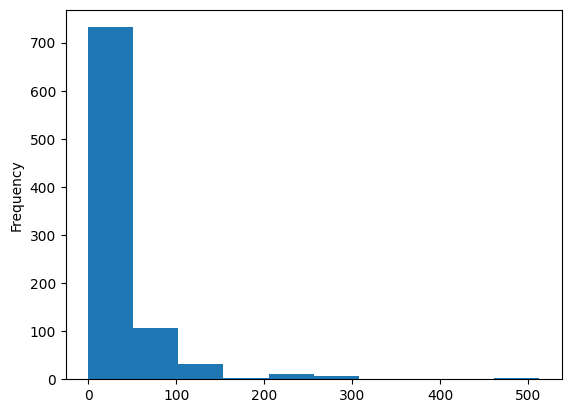

In [ ]:
# finding maximum and minimum fare using hist plot
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

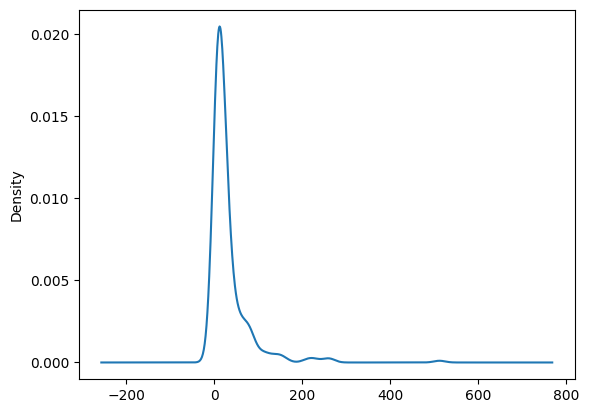

In [ ]:
# finding maximum and minimum fare using hist plot
df['Fare'].plot(kind='kde')

In [ ]:
# finding skewness of the fare column
df['Fare'].skew()

4.787316519674893

<Axes: >

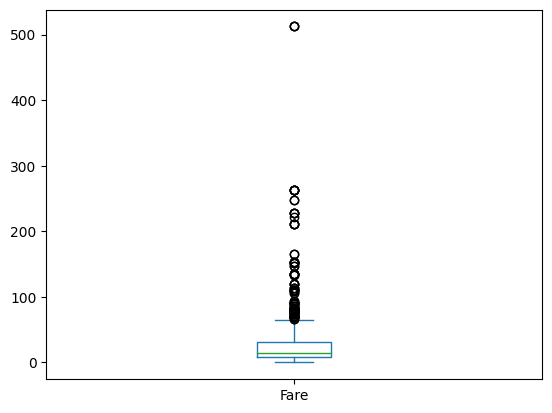

In [ ]:
# finding outliers in the fare column using box plot
df['Fare'].plot(kind='box')

In [ ]:
# having fare greater than 250 in fare column
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
# finding missing values in the fare column
df['Fare'].isnull().sum()

0

### Survived

**conclusions**

- Parch and SibSp cols can be merged to form  a new col call family_size
- Create a new col called is_alone

In [ ]:
# finding the embarking cities in total
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

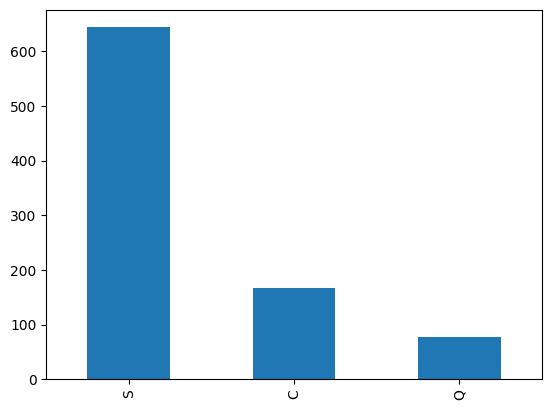

In [ ]:
# finding the emgarking cities in total and embarked ratio of the passengers using bar plot
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='Embarked'>

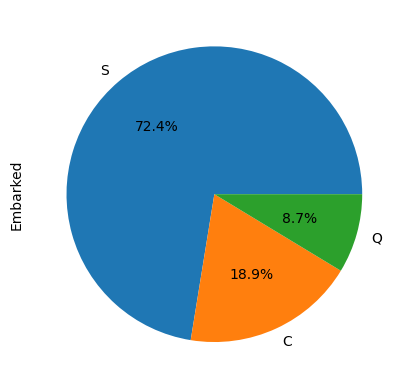

In [ ]:
# finding the emgarking cities in total and embarked ratio of the passengers using pie plot
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
# finding missing values in the sex column
df['Sex'].isnull().sum()

0

<Axes: xlabel='Pclass', ylabel='Survived'>

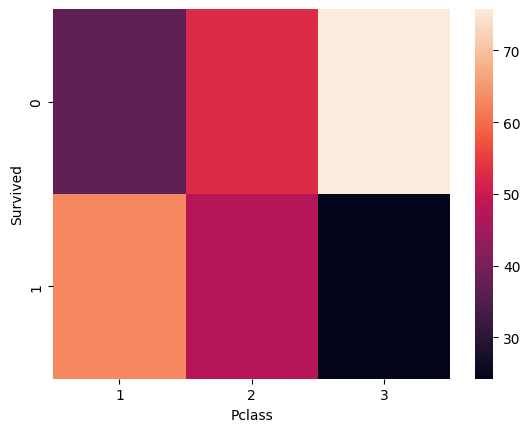

In [ ]:
# finding survival of the passengers in the passenger class column using pandas pd.crosstab()
# and heatmap of the seaborn
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

In [ ]:
# finding survival of the passengers in the sex column using pandas pd.crosstab()
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [ ]:
# finding survival of the passengers in the embarked column using pandas pd.crosstab()
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [ ]:
# finding survival of the passengers sex wise in the embarked column
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [ ]:
# finding survival of the passengers passenger class wise in the embarked column
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


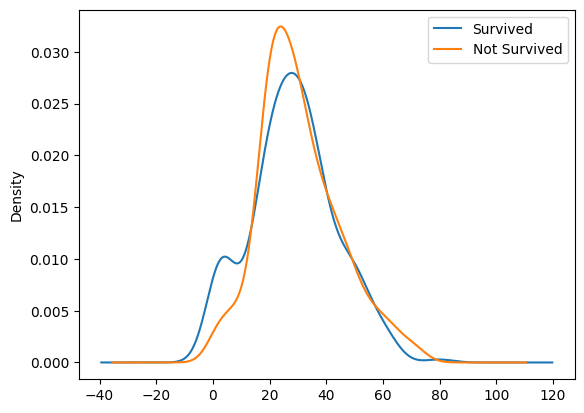

In [ ]:
# survived and age

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [ ]:
# average age of the survived passengers
df[df['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [ ]:
# finding siblings of the passengers using value_counts()
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
# passengers holding CA. 2343 ticket
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# family of the Sage
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# reading test dataset
df1 = pd.read_csv('/content/test.csv')

In [ ]:
# joining train and test dataset together
df = pd.concat([df,df1])

In [ ]:
# passengers holding CA. 2144 ticket
df[df['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [ ]:
# making an individual column of the fare
df['Individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

<Axes: >

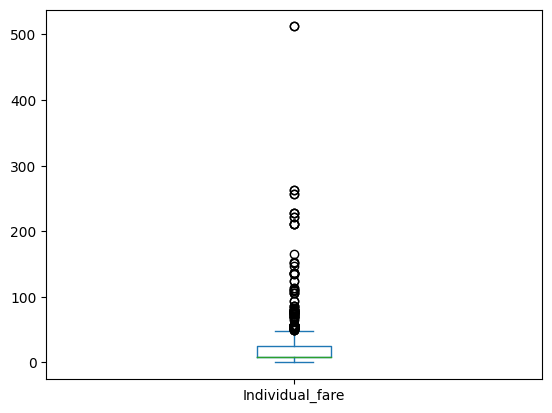

In [ ]:
# finding individual fare using box plot
df['Individual_fare'].plot(kind='box')

In [ ]:
# statistical test
df[['Individual_fare','Fare']].describe()

,Individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [ ]:
# information test
df['Fare'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1309 entries, 0 to 417
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
1308 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [ ]:
# creating a family size column to devide passengers into individual, small and large families
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
### Creating a function to devide families into individual, small and large 
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):

  if num == 1:
    return 'Alone'
  elif num>1 and num <5:
    return "Small"
  else:
    return "Large"

In [ ]:
# finally creating a column of the family size
df['Family_type'] = df['Family_size'].apply(transform_family_size)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,Alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,Alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,Alone


In [ ]:
# finding the survival of passengers family type wise 
pd.crosstab(df['Survived'],df['Family_type'],normalize='columns')*100

Family_type,Alone,Large,Small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [ ]:
# creating a surname column using split() and str accessor
df['Surname'] = df['Name'].str.split(',').str.get(0)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,Small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,Small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,Alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,Small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,Alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,Alone,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,Alone,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,Alone,Ware


In [ ]:
# creating a title column
df['Title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [ ]:
# removing unnecessary titles using replace() and str accessor
df['Title'] = df['Title'].str.replace('Rev.','Other')
df['Title'] = df['Title'].str.replace('Dr.','Other')
df['Title'] = df['Title'].str.replace('Col.','Other')
df['Title'] = df['Title'].str.replace('Major.','Other')
df['Title'] = df['Title'].str.replace('Capt.','Other')
df['Title'] = df['Title'].str.replace('The','Other')
df['Title'] = df['Title'].str.replace('Jonkheer.','Other')

<ipython-input-47-defeaedbaf1d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace('Rev.','Other')
<ipython-input-47-defeaedbaf1d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace('Dr.','Other')
<ipython-input-47-defeaedbaf1d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace('Col.','Other')
<ipython-input-47-defeaedbaf1d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace('Major.','Other')
<ipython-input-47-defeaedbaf1d>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace('Capt.','Other')
<ipython-input-47-defeaedbaf1d>:8: FutureWarning: The default value of re

In [ ]:
# storing titles in a variable called temp_df
temp_df = df[df['Title'].isin(['Mr.','Miss.','Mrs.','Master.','ootherr'])]

In [ ]:
# finding survival of the passengers title wise in title column
pd.crosstab(temp_df['Survived'],temp_df['Title'],normalize='columns')*100

Title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0.0,42.5,30.21978,84.332689,20.8
1.0,57.5,69.78022,15.667311,79.2


In [ ]:
# finding missing values in the cabin column
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.774637127578304

In [ ]:
# filling the missing values with M using fillna()
df['Cabin'].fillna('M',inplace=True)

In [ ]:
# finding total values in the cabin column
df['Cabin'].value_counts()

M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [ ]:
# creating a new column called deck from cabin column
df['Deck'] = df['Cabin'].str[0]

In [ ]:
# finding total values in the deck column
df['Deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [ ]:
# finding survival of the passengers deck and class wise in the class column
pd.crosstab(df['Deck'],df['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='Deck'>

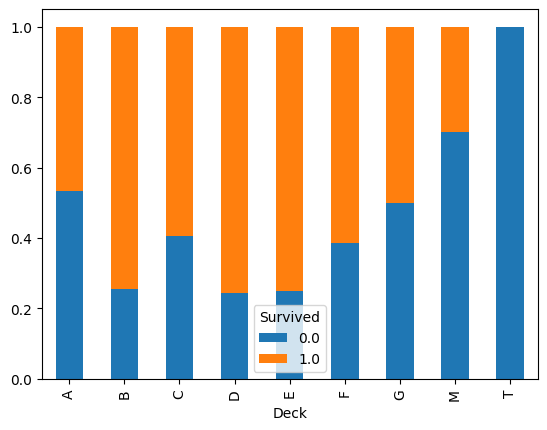

In [ ]:
# finding survival of the passengers deck wise using bar plot
pd.crosstab(df['Deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

<Axes: >

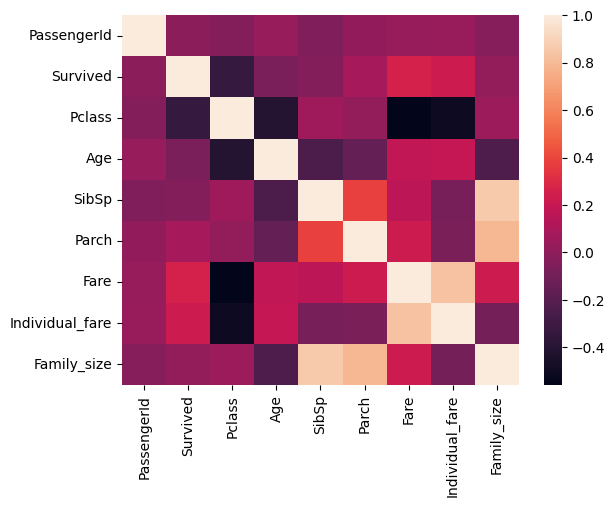

In [ ]:
# finding correlation using heatmap() of the seaborn
sns.heatmap(df.corr())

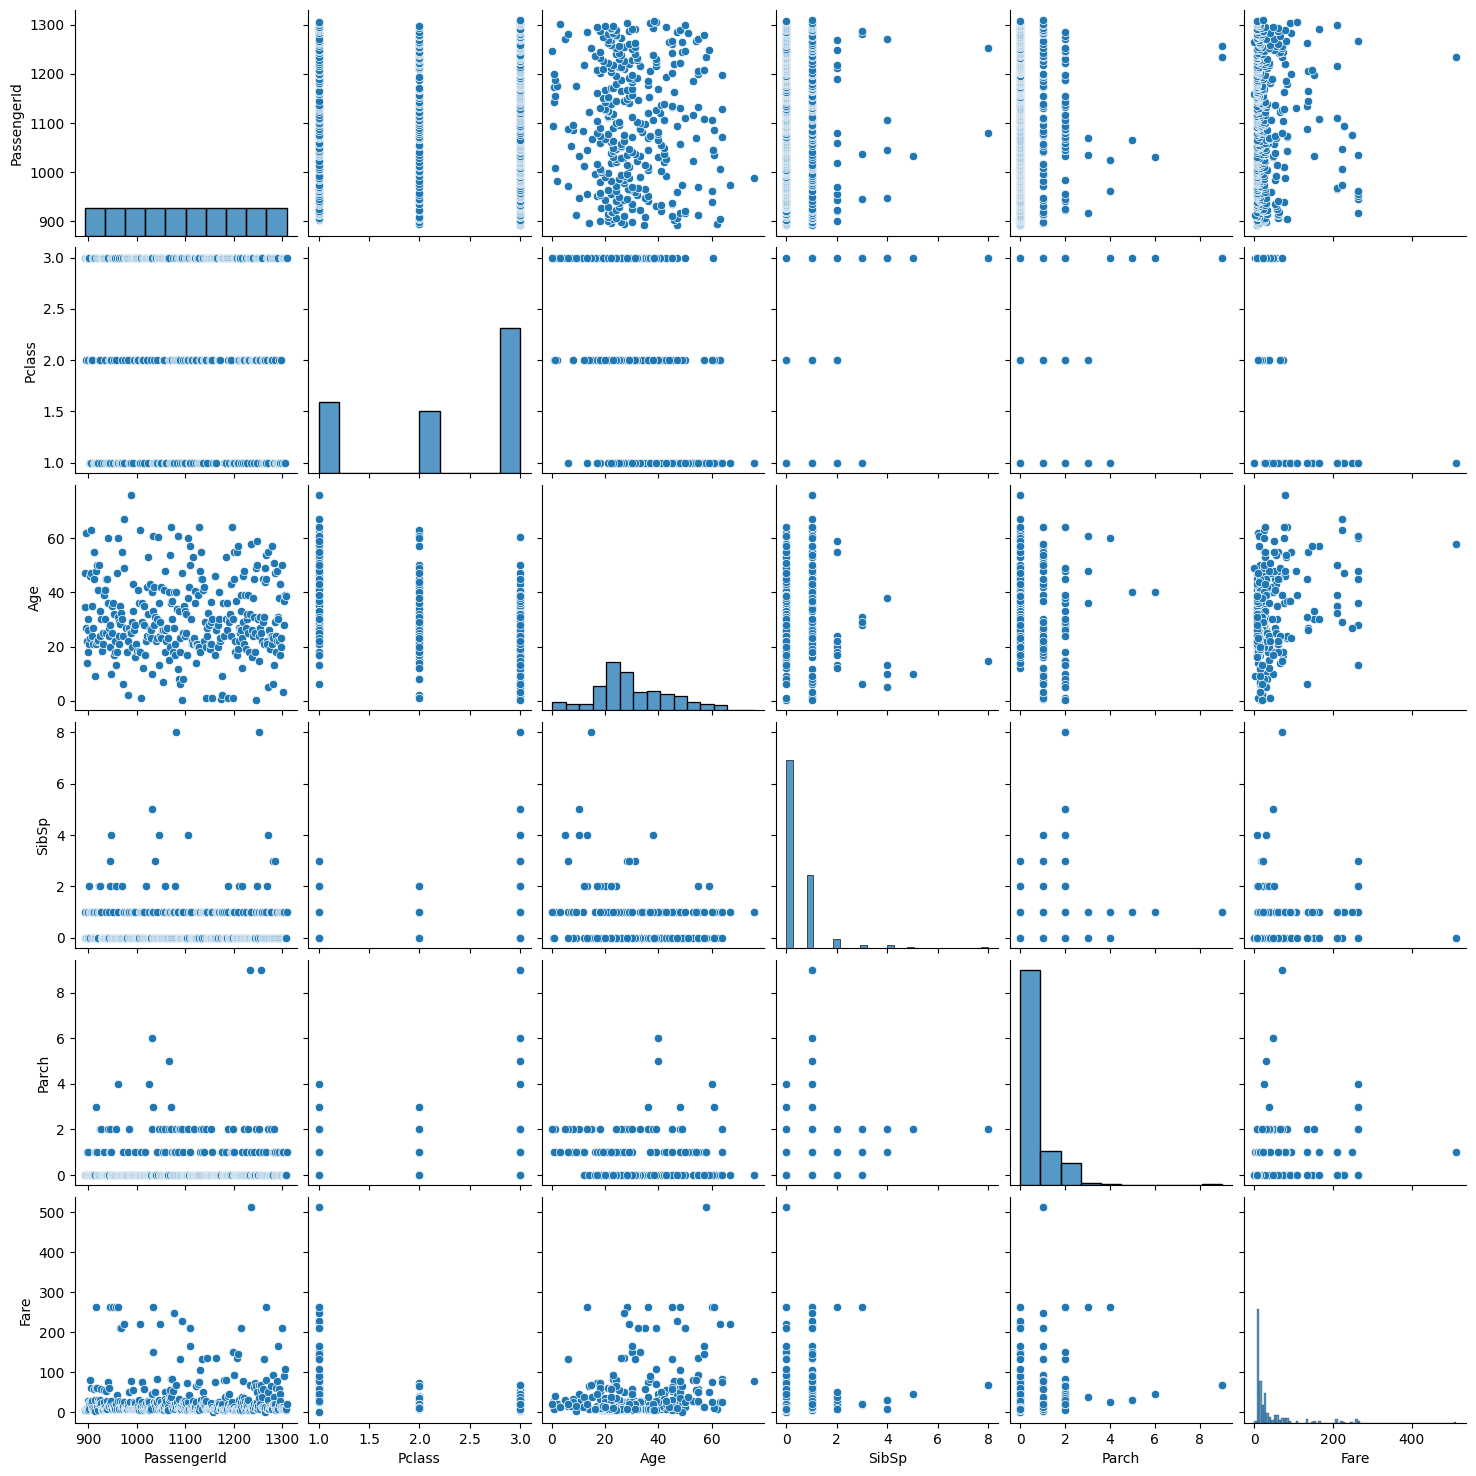

In [ ]:
# pairplot of the df1
sns.pairplot(df1)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname,Title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2,Small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,Small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1,Alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,Small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1,Alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,M,S,8.050000,1,Alone,Spector,Mr.,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone,Oliva y Ocana,Dona.,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.250000,1,Alone,Saether,Mr.,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,M,S,8.050000,1,Alone,Ware,Mr.,M


In [ ]:
# finding missing values in the Ticket column
df['Ticket'].isnull().value_counts()

False    1309
Name: Ticket, dtype: int64

In [ ]:
# no need of the Parch column and dropped(deleted) using drop()
df.drop('Parch',axis = 'columns',inplace = True)

In [ ]:
# test
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname,Title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,M,S,3.62500,2,Small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C,35.64165,2,Small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,M,S,7.92500,1,Alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S,26.55000,2,Small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,M,S,8.05000,1,Alone,Allen,Mr.,M


In [ ]:
# siblings survival and death using crosstab()
pd.crosstab(df['SibSp'],df['Survived'])

Survived,0.0,1.0
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Axes: xlabel='SibSp'>

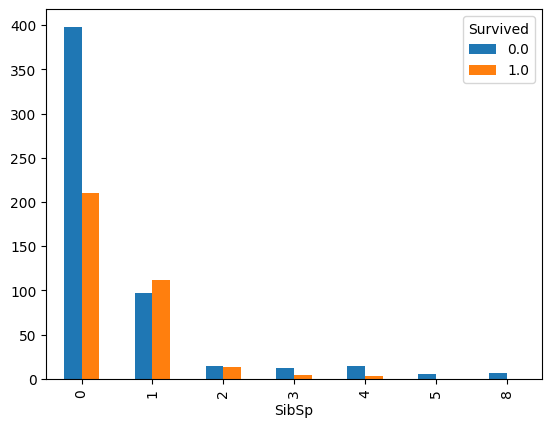

In [ ]:
# siblings survival and death using bar plot
pd.crosstab(df['SibSp'],df['Survived']).plot(kind='bar')

In [ ]:
# number of males and females in the deck column
pd.crosstab(df['Sex'],df['Deck'])

Deck,A,B,C,D,E,F,G,M,T
Sex,,,,,,,,,
female,4,36,46,23,19,8,5,325,0
male,18,29,48,23,22,13,0,689,1


<Axes: xlabel='Sex'>

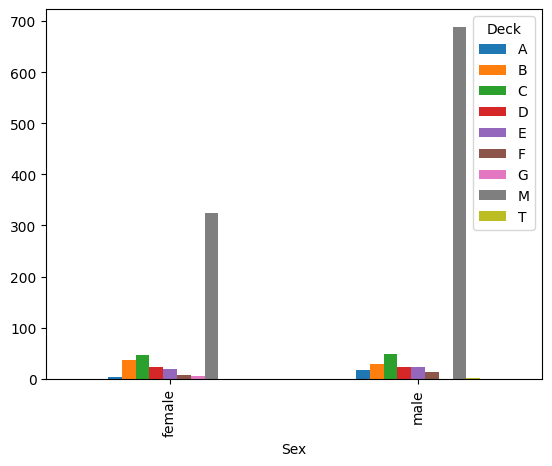

In [ ]:
# number of males and females in the deck column using bar plot
pd.crosstab(df['Sex'],df['Deck']).plot(kind='bar')

In [ ]:
# survival according to fare seems normal
pd.crosstab(df['Fare'],df['Survived'])

Survived,0.0,1.0
Fare,,
0.0000,14,1
4.0125,1,0
5.0000,1,0
6.2375,1,0
6.4375,1,0
...,...,...
227.5250,1,3
247.5208,1,1
262.3750,0,2


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname,Title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,M,S,3.625000,2,Small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C,35.641650,2,Small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1,Alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S,26.550000,2,Small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,M,S,8.050000,1,Alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,A.5. 3236,8.0500,M,S,8.050000,1,Alone,Spector,Mr.,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone,Oliva y Ocana,Dona.,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,SOTON/O.Q. 3101262,7.2500,M,S,7.250000,1,Alone,Saether,Mr.,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,359309,8.0500,M,S,8.050000,1,Alone,Ware,Mr.,M


In [ ]:
# finding young passengers with zero(0) fare and seems normal
df[df['Age']<30]
pd.crosstab(df['Age'],df['Fare'])


Fare,0.0000,3.1708,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Age,,,,,,,,,,,,,,,,,,,,,
0.17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# passengers with high individual fare rescued more than low individual fare
temp_df = df.groupby(df['Survived'])['Survived','PassengerId','Individual_fare']
temp_df.describe()


<ipython-input-70-e196e152d2c8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_df = df.groupby(df['Survived'])['Survived','PassengerId','Individual_fare']


Survived                                    PassengerId              \
            count mean  std  min  25%  50%  75%  max       count        mean   
Survived                                                                       
0.0         549.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       549.0  447.016393   
1.0         342.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       342.0  444.368421   

          ...               Individual_fare                             \
          ...    75%    max           count       mean        std  min   
Survived  ...                                                            
0.0       ...  675.0  891.0           549.0  13.651162  18.918880  0.0   
1.0       ...  651.5  890.0           342.0  29.973691  51.116704  0.0   

                                          
             25%     50%   75%       max  
Survived                                  
0.0       7.2264   7.925  13.0  227.5250  
1.0       7.7500  13.000  30.5  512.3292  

[2 rows x 24 columns]

In [ ]:
# passengers less than 18 years
df[df['Age']<18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname,Title,Deck
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,349909,21.0750,M,S,4.215000,5,Large,Palsson,Master.,M
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,237736,30.0708,M,C,15.035400,2,Small,Nasser,Mrs.,M
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,PP 9549,16.7000,G6,S,5.566667,3,Small,Sandstrom,Miss.,G
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,350406,7.8542,M,S,7.854200,1,Alone,Vestrom,Miss.,M
16,17,0.0,3,"Rice, Master. Eugene",male,2.0,4,382652,29.1250,M,Q,4.854167,6,Large,Rice,Master.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,1271,NaN,3,"Asplund, Master. Carl Edgar",male,5.0,4,347077,31.3875,M,S,4.483929,7,Large,Asplund,Master.,M
389,1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,349909,21.0750,M,S,4.215000,5,Large,Palsson,Master.,M
392,1284,NaN,3,"Abbott, Master. Eugene Joseph",male,13.0,0,C.A. 2673,20.2500,M,S,6.750000,3,Small,Abbott,Master.,M
403,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,113059,47.1000,M,S,47.100000,1,Alone,Carrau,Mr.,M


In [ ]:
# somehow small family type survived more than alone and large
pd.crosstab(df['Survived'],df['Family_type'])

Family_type,Alone,Large,Small
Survived,,,
0.0,374,52,123
1.0,163,10,169


<Axes: xlabel='Survived'>

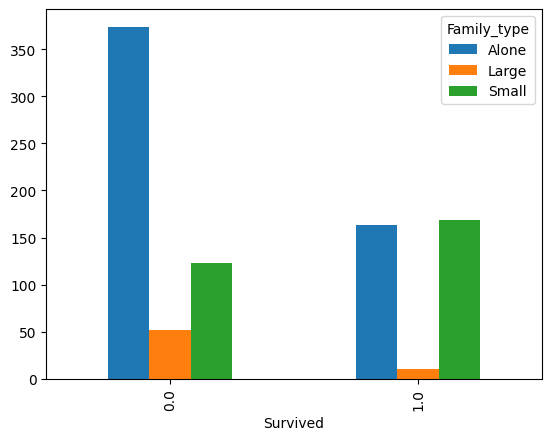

In [ ]:
# somehow small family type survived more than alone and large using visualization bar chart
pd.crosstab(df['Survived'],df['Family_type']).plot(kind='bar')

In [ ]:
# survival of passengers title wise. it seems passengers with Miss title were rescued more
pd.crosstab(df['Title'],df['Survived'])

Survived,0.0,1.0
Title,,
Don.,1,0
Lady.,0,1
Master.,17,23
Miss.,55,127
Mlle.,0,2
Mme.,0,1
Mr.,436,81
Mrs.,26,99
Ms.,0,1


<Axes: xlabel='Title'>

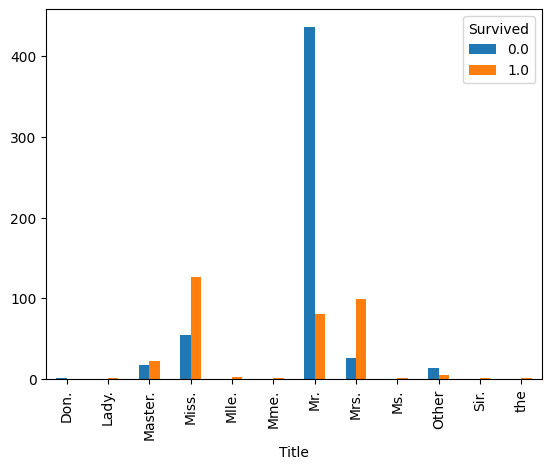

In [ ]:
# survival of passengers title wise. it seems passengers with Miss title were rescued more
# Visualization with bar plot
pd.crosstab(df['Title'],df['Survived']).plot(kind='bar')

In [ ]:
# comparison of title column and individual fare. it seems like all the passengers with
# Miss title paid high fare and were given priority for rescue
pd.crosstab(df['Title'],df['Individual_fare'])

Individual_fare,0.000000,1.110714,1.132143,1.585400,2.409733,2.583333,2.618067,2.641667,2.683333,2.838900,...,151.550000,153.462500,164.866700,211.337500,211.500000,221.779200,227.525000,256.164600,262.375000,512.329200
Title,,,,,,,,,,,,,,,,,,,,,
Don.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dona.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lady.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Master.,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miss.,0,1,1,0,0,1,0,0,0,0,...,2,1,1,2,1,1,2,0,2,1
Mlle.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mme.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mr.,16,0,0,0,3,0,1,2,1,0,...,0,0,0,0,1,1,1,1,0,1
Mrs.,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# passengers with zero(0) fare mostly embarked from S region
pd.crosstab(df['Individual_fare'],df['Embarked'])

Embarked,C,Q,S
Individual_fare,,,
0.000000,0,0,17
1.110714,0,0,1
1.132143,0,0,1
1.585400,0,0,1
2.409733,3,0,0
...,...,...,...
221.779200,0,0,2
227.525000,3,0,0
256.164600,2,0,0


<Axes: ylabel='Density'>

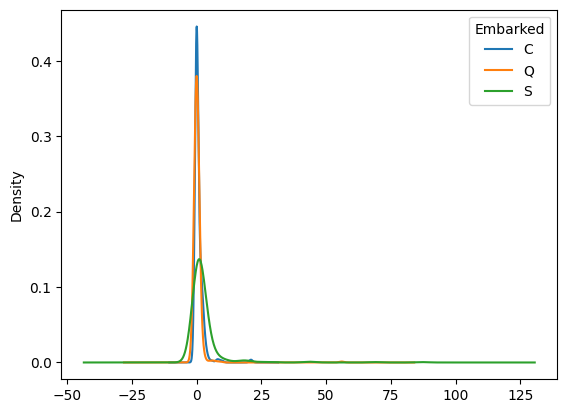

In [ ]:
# passengers with zero(0) fare mostly embarked from S region
pd.crosstab(df['Individual_fare'],df['Embarked']).plot(kind='kde')